## Analisis Perilaku Konsumen untuk Menentukan Paket Prabayar Manakah yang Lebih Menguntungkan


Megaline merupakan perusahaan operator telekomunikasi. Saat ini, perusahaan tersebut menawarkan kepada kliennya berupa dua jenis paket prabayar yaitu Paket Surf dan Paket Ultimate. Kita akan melakukan analisis dua paket prabayar tersebut untuk menentukan paket apakah yang paling banyak memberikan keuntungan bagi perusahaan. Langkah pertama yang harus kita lakukan adalah menyiapkan data dan melihat informasi umumnya, tahap ini kita akan melihat apakah ada data yang nilainya kosong ataupun tipe data yang perlu diubah. Setelah itu kita akan melakukan processing data seperti melakukan pembulatan untuk durasi panggilan dan paket internet. Disini kita juga akan menghitung total pendapatan yang dihasilkan oleh Paket Surf dan Paket Ultimate dan membandingkannya. Kita juga akan melakukan uji statistik dan uji hipotesis dalam project ini. Berikut ini merupakan informasi penting yang harus menjadi perhatian mengenai rincian paket:

Surf

Biaya bulanan: USD 20,
500 menit durasi panggilan per bulan, 50 SMS, dan 15 GB data

Setelah melebihi batas paket, akan dikenakan:
1 menit: 3 sen
1 SMS: 3 sen
1 GB data: USD 10


Ultimate

Biaya bulanan: USD 70,
3000 menit durasi panggilan per bulan, 1000 SMS, dan 30 GB data

Setelah melebihi batas paket, akan dikenakan:
1 menit: 1 sen
1 SMS: 1 sen
1 GB data: $7

**Table of Content**
1. General Info
2. Data Preprocessing
3. Analysis
4. Hypothesis Testing
5. Kesimpulan

# GENERAL INFO

kita akan meng-import library yang akan digunakan untuk project ini.

In [123]:
# Muat semua library
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Memuat Data

Kita akan melihat data-data yang diberikan dalam bentuk dataframe.

In [124]:
# Muat file data ke dalam DataFrame yang berbeda
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


Kita akan melihat informasi umum dari dataframe dan memperbaikinya jika ada tipe data yang kurang sesuai.

### INFORMASI CALLS

In [125]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [126]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [127]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [128]:
calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

Dari informasi umum di atas kita akan mengubah tipe kolom 'call_date' menjadi tipe date-time dan untuk durasi panggilan akan dibulatkan.

### INFORMASI INTERNET

In [129]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [130]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [131]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [132]:
internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

Dari informasi umum di atas kita akan mengubah tipe kolom 'session_date' menjadi tipe date-time dan kolom 'mb_used' untuk penggunakan internet akan dibulatkan setiap bulannya.

### INFORMASI MESSAGES

In [133]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [134]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [135]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [136]:
messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

Dari informasi umum di atas kita akan mengubah tipe kolom 'message_date' menjadi tipe date-time.

### INFORMASI PLANS

In [137]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [138]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [139]:
plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

### INFORMASI USER

In [140]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [141]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [142]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [143]:
users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

Dari informasi umum di atas kita akan mengubah tipe kolom 'reg_date' menjadi tipe date-time.

# Data Preprocessing

Disini kita akan mengkonversikan tipe data menjadi date-time dan mengeliminasi kesalahan pada data.

## User

In [144]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [145]:
# Tampilkan sampel data pengguna
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [146]:
users['plan'] = users['plan'].astype('category')

In [147]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   user_id     500 non-null    int64   
 1   first_name  500 non-null    object  
 2   last_name   500 non-null    object  
 3   age         500 non-null    int64   
 4   city        500 non-null    object  
 5   reg_date    500 non-null    object  
 6   plan        500 non-null    category
 7   churn_date  34 non-null     object  
dtypes: category(1), int64(2), object(5)
memory usage: 28.1+ KB


## Calls

In [148]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [149]:
# Mengubah tipe data menjadi date-time
calls['call_date'] = pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [150]:
calls[calls['duration'] <=0]

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0
...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0
137715,1499_184,1499,2018-09-15,0.0
137720,1499_189,1499,2018-12-27,0.0
137722,1499_191,1499,2018-12-24,0.0


In [151]:
calls[calls['duration'] <=0].shape[0] / len(calls) *100

19.482339274694162

Setelah kita mengetahui jumlah durasi yang 0 detik, kita memutuskan untuk membiarkannya dikarenakan jumlahnya sangat banyak atau hampir 20% dari total.

Sekarang kita akan menambahkan kolom 'month' yang diisi dengan nama bulan.

In [152]:
calls['month'] = calls['call_date'].dt.month_name()

Sekarang kita akan membulatkan kolom 'duration' ke pembulatan atas.

In [153]:
calls['duration_rounded'] = np.ceil(calls['duration']).astype('int')
calls.head()

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,December,9
1,1000_145,1000,2018-12-27,13.66,December,14
2,1000_247,1000,2018-12-27,14.48,December,15
3,1000_309,1000,2018-12-28,5.76,December,6
4,1000_380,1000,2018-12-30,4.22,December,5


In [154]:
calls_agg = calls.groupby(['user_id','month']).agg({
    'id':'count',
    'duration_rounded':'sum'
}).reset_index().rename(columns={
    'id':'count_calls',
    'duration_rounded':'total_duration'
})

In [155]:
calls_agg

,user_id,month,count_calls,total_duration
0,1000,December,16,124
1,1001,August,27,182
2,1001,December,56,412
3,1001,November,64,426
4,1001,October,65,393
...,...,...,...,...
2253,1498,September,45,363
2254,1499,December,65,496
2255,1499,November,45,308
2256,1499,October,53,385


## Pesan/SMS

In [156]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [157]:
# Tampilkan sampel data untuk SMS
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Sekarang kita akan mengubah tipe data di kolom 'message_date' menjadi tipe date-time.

In [158]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [159]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Sekarang kita akan menambahkan kolom 'month' yang berisi nama bulan.

In [160]:
messages['month'] = messages['message_date'].dt.month_name()

In [161]:
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December


In [162]:
messages_agg = messages.groupby(['user_id','month']).agg({
    'id':'count'
}).reset_index().rename(columns={
    'id':'message_count'
})

In [163]:
messages_agg

,user_id,month,message_count
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
...,...,...,...
1801,1496,December,11
1802,1496,November,13
1803,1496,October,18
1804,1496,September,21


## Internet

In [164]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [165]:
# Tampilkan sampel data untuk traffic internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Sekarang kita akan mengubah tipe data di kolom 'session_date' menjadi tipe date-time dan memberikan nama bulan.

In [166]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [167]:
internet['month'] = internet['session_date'].dt.month_name()
internet

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,October
104821,1499_216,1499,2018-12-30,304.72,December
104822,1499_217,1499,2018-09-22,292.75,September
104823,1499_218,1499,2018-12-07,0.00,December


In [168]:
internet_agg = internet.groupby(['user_id','month']).agg({
    'mb_used':'sum'
}).reset_index()

In [169]:
internet_agg

,user_id,month,mb_used
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
...,...,...,...
2272,1498,September,22827.28
2273,1499,December,22059.21
2274,1499,November,16813.83
2275,1499,October,19492.43


Selanjutnya kita akan mengubah megabyte ke gigabyte.

In [170]:
internet_agg['gb_used'] = internet_agg['mb_used'] / 1024
internet_agg['gb_used_rounded'] = np.ceil(internet_agg['gb_used']).astype('int')

In [171]:
internet_agg

,user_id,month,mb_used,gb_used,gb_used_rounded
0,1000,December,1901.47,1.856904,2
1,1001,August,6919.15,6.756982,7
2,1001,December,19369.18,18.915215,19
3,1001,November,18504.30,18.070605,19
4,1001,October,22330.49,21.807119,22
...,...,...,...,...,...
2272,1498,September,22827.28,22.292266,23
2273,1499,December,22059.21,21.542197,22
2274,1499,November,16813.83,16.419756,17
2275,1499,October,19492.43,19.035576,20


In [172]:
calls_agg.shape, internet_agg.shape, messages_agg.shape

((2258, 4), (2277, 5), (1806, 3))

## MERGE

Selanjutnya kita akan menggabungkan CALL, INTERNET, dan MESSAGES.

In [173]:
df_merge = pd.merge(calls_agg, internet_agg, on=['user_id','month'], how='outer')
df_merge = pd.merge(df_merge, messages_agg, on=['user_id','month'], how='outer')
df_merge

,user_id,month,count_calls,total_duration,mb_used,gb_used,gb_used_rounded,message_count
0,1000,December,16.0,124.0,1901.47,1.856904,2.0,11.0
1,1001,August,27.0,182.0,6919.15,6.756982,7.0,30.0
2,1001,December,56.0,412.0,19369.18,18.915215,19.0,44.0
3,1001,November,64.0,426.0,18504.30,18.070605,19.0,36.0
4,1001,October,65.0,393.0,22330.49,21.807119,22.0,53.0
...,...,...,...,...,...,...,...,...
2288,1349,December,NaN,NaN,13039.91,12.734287,13.0,61.0
2289,1349,November,NaN,NaN,17128.26,16.726816,17.0,72.0
2290,1349,October,NaN,NaN,13093.55,12.786670,13.0,76.0
2291,1361,May,NaN,NaN,1519.69,1.484072,2.0,2.0


In [174]:
df_merge.isnull().sum()

user_id              0
month                0
count_calls         35
total_duration      35
mb_used             16
gb_used             16
gb_used_rounded     16
message_count      487
dtype: int64

Terdapat nilai kosong dan hal ini wajar karena ada saja pelanggan yang bulan itu tidak melakukan panggilan tapi menggunakan paket internet dan SMS.

In [175]:
# Mengisi nilai yang kosong dengan angka 0
df_merge = df_merge.fillna(0).drop(columns=['mb_used','gb_used'])
df_merge

,user_id,month,count_calls,total_duration,gb_used_rounded,message_count
0,1000,December,16.0,124.0,2.0,11.0
1,1001,August,27.0,182.0,7.0,30.0
2,1001,December,56.0,412.0,19.0,44.0
3,1001,November,64.0,426.0,19.0,36.0
4,1001,October,65.0,393.0,22.0,53.0
...,...,...,...,...,...,...
2288,1349,December,0.0,0.0,13.0,61.0
2289,1349,November,0.0,0.0,17.0,72.0
2290,1349,October,0.0,0.0,13.0,76.0
2291,1361,May,0.0,0.0,2.0,2.0


In [176]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [177]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Kita akan menggabungkan data user dengan plans agar informasinya menjadi lebih lengkap.

In [178]:
users_merge = pd.merge(users, plans, left_on = 'plan', right_on = 'plan_name')
users_merge['gb_per_month_included'] = users_merge['mb_per_month_included'] / 1024
users_merge = users_merge.drop(columns=['first_name','last_name','age','reg_date','churn_date','mb_per_month_included'])
users_merge

,user_id,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
497,1496,"New Orleans-Metairie, LA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0


In [179]:
df_merge_full = pd.merge(df_merge, users_merge, on=['user_id'], how='inner')
df_merge_full

,user_id,month,count_calls,total_duration,gb_used_rounded,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,December,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,August,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
2,1001,December,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
3,1001,November,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
4,1001,October,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,December,0.0,0.0,36.0,78.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
2289,1204,November,0.0,0.0,21.0,42.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
2290,1349,December,0.0,0.0,13.0,61.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15.0
2291,1349,November,0.0,0.0,17.0,72.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15.0


Selanjutnya kita akan membuat sebuah fungsi untuk menghitung biaya yang dikenakan oleh user termasuk biaya kelebihan panggilan, internet, dan SMS.

In [180]:
def chargeable_calls(row):
    plan = row['plan']
    minutes_used = row['total_duration']
    
    if plan == 'surf':
        if minutes_used > 500:
            chargeable = (minutes_used - 500) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [181]:
def chargeable_messages(row):
    plan = row['plan']
    number_of_texts = row['message_count']
    
    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = (number_of_texts - 50) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = (number_of_texts - 1000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [182]:
def chargeable_data(row):
    plan = row['plan']
    data_rounded_up = row['gb_used_rounded']
    
    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = (data_rounded_up - 15) * 10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = (data_rounded_up - 30) * 7
        else:
            chargeable = 0
    return chargeable

In [183]:
df_merge_full['charge_calls'] = df_merge_full.apply(chargeable_calls, axis=1)
df_merge_full['charge_message'] = df_merge_full.apply(chargeable_messages, axis=1)
df_merge_full['charge_internet'] = df_merge_full.apply(chargeable_data, axis=1)

In [184]:
df_merge_full.head()

,user_id,month,count_calls,total_duration,gb_used_rounded,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,charge_calls,charge_message,charge_internet
0,1000,December,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0
1,1001,August,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0
2,1001,December,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0
3,1001,November,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0
4,1001,October,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0


Kita akan menghitung biaya yang dikeluarkan oleh user.

In [185]:
df_merge_full['revenue'] = df_merge_full['usd_monthly_pay'] + df_merge_full['charge_calls'] + df_merge_full['charge_internet'] + df_merge_full['charge_message']

In [186]:
df_merge_full.head()

,user_id,month,count_calls,total_duration,gb_used_rounded,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,charge_calls,charge_message,charge_internet,revenue
0,1000,December,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00
1,1001,August,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00
2,1001,December,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
3,1001,November,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00
4,1001,October,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09


In [187]:
income_surf = df_merge_full.loc[df_merge_full['plan']=='surf']['revenue']
income_surf

1        20.00
2        60.00
3        60.00
4        90.09
5        20.00
         ...  
2286    181.14
2287    240.78
2290     20.33
2291     40.66
2292     20.78
Name: revenue, Length: 1573, dtype: float64

In [188]:
income_ultimate = df_merge_full.loc[df_merge_full['plan']=='ultimate']['revenue']
income_ultimate

0        70.0
19       84.0
20       70.0
26       70.0
27       70.0
        ...  
2231     70.0
2247     70.0
2269     70.0
2288    112.0
2289     70.0
Name: revenue, Length: 720, dtype: float64

# ANALYSIS

## Mempelajari Perilaku Pengguna

Sekarang kita akan melakukan perbandingan kedua paket mana yang lebih menguntungkan, kita akan membuat sebuah diagram batang dan membandingkan antara Paket Surf dan Paket Ultimate.

In [189]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
df_merge_full_surf = df_merge_full[df_merge_full['plan']=='surf'].reset_index(drop=True)
df_merge_full_ultimate = df_merge_full[df_merge_full['plan']=='ultimate'].reset_index(drop=True)

### Calls

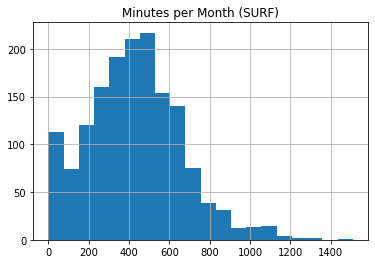

In [190]:
df_merge_full_surf['total_duration'].hist(bins=20)
plt.title('Minutes per Month (SURF)')
plt.show()

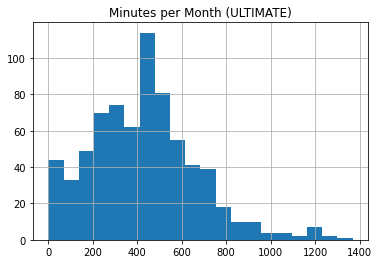

In [191]:
df_merge_full_ultimate['total_duration'].hist(bins=20)
plt.title('Minutes per Month (ULTIMATE)')
plt.show()

In [192]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
np.var(df_merge_full_surf['total_duration'])

54933.334591317485

In [193]:
np.var(df_merge_full_ultimate['total_duration'])

57764.125277777785

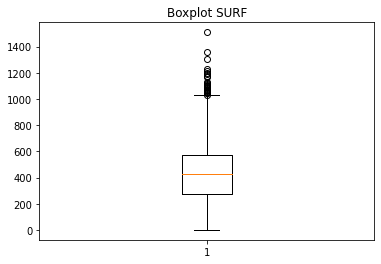

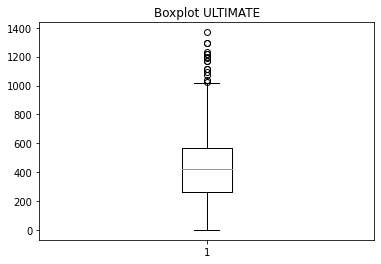

In [194]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.boxplot(df_merge_full_surf['total_duration'])
plt.title('Boxplot SURF')
plt.show()

plt.boxplot(df_merge_full_ultimate['total_duration'])
plt.title('Boxplot ULTIMATE')
plt.show()

In [195]:
df_merge_full_surf['total_duration'].describe(), df_merge_full_ultimate['total_duration'].describe()

(count    1573.000000
 mean      428.749523
 std       234.453150
 min         0.000000
 25%       272.000000
 50%       425.000000
 75%       576.000000
 max      1510.000000
 Name: total_duration, dtype: float64,
 count     720.000000
 mean      430.450000
 std       240.508762
 min         0.000000
 25%       260.000000
 50%       424.000000
 75%       565.250000
 max      1369.000000
 Name: total_duration, dtype: float64)

Dari kedua histogram didapatkan bahwa Paket Surf dan Paket Ultimate paling banyak total 500 dan 450 menit. Dari grafik boxplot didapatkan nilai median Paket Surf dan Paket Ultimate yaitu sekitar 430 menit.

### Messages

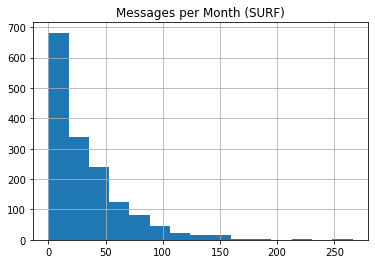

In [196]:
df_merge_full_surf['message_count'].hist(bins=15)
plt.title('Messages per Month (SURF)')
plt.show()

Histogram jumlah SMS per bulan untuk Paket Surf paling banyak berada di rentang 0 sampai 15 SMS. Bisa dikatakan bahwa kebanyakan orang sedikit menggunakan SMS tiap bulannya. Dari grafik ternyata juga terdapat sebuah outlier.

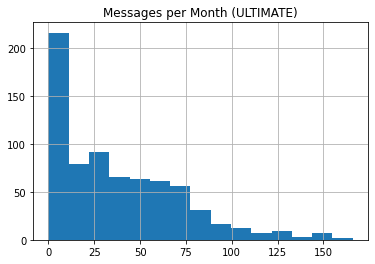

In [197]:
df_merge_full_ultimate['message_count'].hist(bins=15)
plt.title('Messages per Month (ULTIMATE)')
plt.show()

Histogram Paket Ultimate menunjukkan jumlah SMS setiap bulannya berada di rentang 0 sampai 10 SMS. Dari histogram tersebut juga terdapat outlier.

In [198]:
np.var(df_merge_full_surf['message_count'])

1126.008231726662

In [199]:
np.var(df_merge_full_ultimate['message_count'])

1207.0779147376545

In [200]:
df_merge_full_surf['message_count'].describe()

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_count, dtype: float64

In [201]:
df_merge_full_ultimate['message_count'].describe()

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_count, dtype: float64

Berdasarkan kedua histogram dan nilai rata-rata SMS per bulan, dapat ditarik sebuah kesimpulan bahwa untuk Paket Surf, para pengguna mengirimkan SMS di rentang 0 sampai 15 SMS tiap bulannya. Sementara pengguna Paket Ultimate, mengirimkan SMS di rentang 0 sampai 10 SMS tiap bulannya. Rata-rata pengiriman SMS Paket Surf dan Paket Ultimate yaitu 31 dan 37. Dari data tersebut maka bisa dikatakan bahwa perilaku pengguna tidak jauh berbeda.

### Internet

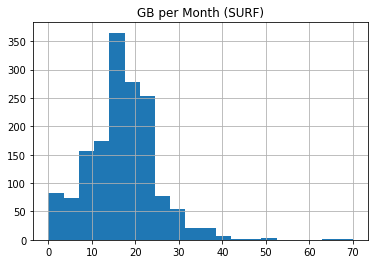

In [202]:
df_merge_full_surf['gb_used_rounded'].hist(bins=20)
plt.title('GB per Month (SURF)')
plt.show()

Histogram penggunaan data internet untuk Paket Surf paling banyak sekitar 15GB. Dari histogram tersebut juga terdapat sebuah outlier.

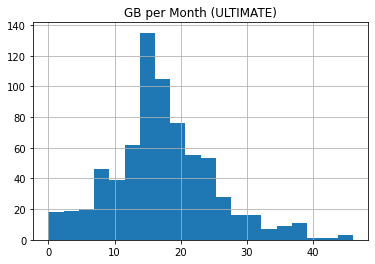

In [203]:
df_merge_full_ultimate['gb_used_rounded'].hist(bins=20)
plt.title('GB per Month (ULTIMATE)')
plt.show()

Untuk Paket Ultimate, penggunaan data internet paling banyak sekitar  15GB.

In [204]:
np.var(df_merge_full_surf['gb_used_rounded'])

61.54444942447023

In [205]:
np.var(df_merge_full_ultimate['gb_used_rounded'])

58.748840663580246

In [206]:
df_merge_full_surf['gb_used_rounded'].describe() , df_merge_full_ultimate['gb_used_rounded'].describe()

(count    1573.000000
 mean       16.670693
 std         7.847522
 min         0.000000
 25%        12.000000
 50%        17.000000
 75%        21.000000
 max        70.000000
 Name: gb_used_rounded, dtype: float64,
 count    720.000000
 mean      17.306944
 std        7.670108
 min        0.000000
 25%       13.000000
 50%       17.000000
 75%       21.000000
 max       46.000000
 Name: gb_used_rounded, dtype: float64)

Berdasarkan perbandingan histogram Paket Surf dan Paket Ultimate, terdapat perbedaan yang tidak terlalu jauh. Dari penggunaan rata-ratanya pun sama yaitu sekitar 17GB.

## Pendapatan

In [207]:
df_merge_full_surf['revenue'].sum()

95491.18

In [208]:
df_merge_full_ultimate['revenue'].sum()

52066.0

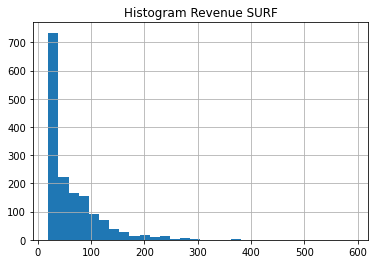

In [209]:
df_merge_full_surf['revenue'].hist(bins=30)
plt.title('Histogram Revenue SURF')
plt.show()

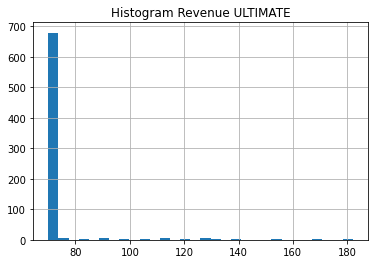

In [210]:
df_merge_full_ultimate['revenue'].hist(bins=30)
plt.title('Histogram Revenue ULTIMATE')
plt.show()

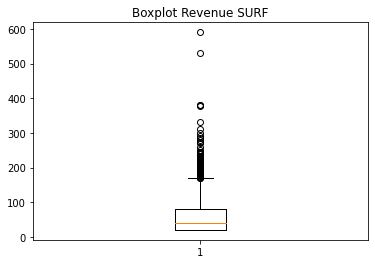

In [211]:
plt.boxplot(df_merge_full_surf['revenue'])
plt.title('Boxplot Revenue SURF')
plt.show()

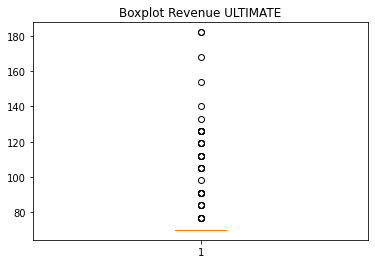

In [212]:
plt.boxplot(df_merge_full_ultimate['revenue'])
plt.title('Boxplot Revenue ULTIMATE')
plt.show()

Berdasarkan data histogram dan boxplot yang telah dilakukan didapatkan pendapatan Paket Surf lebih besar daripada Paket Ultimate.

# HYPOTHESIS TESTING

Kita akan melakukan uji hipotesis, Ho yaitu 'Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf SAMA'. Untuk hipotesis alternatifnya (Ha) yaitu 'Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf TIDAK SAMA'. Kita akan melakukan uji hipotesis dengan st.ttest dan menggunakan alpha = 0.05. Jika nilai p-value kurang dari alpha, maka Ho diterima. 

In [213]:
# Uji Hipotesis 1
# Ho : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf SAMA
# Ha : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf TIDAK SAMA
alpha = 0.05
results = st.ttest_ind(df_merge_full_surf['revenue'], df_merge_full_ultimate['revenue'], equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject Ho')
else:
    print('We can not reject Ho')

p-value: 3.17039054811355e-15
We reject Ho


Dari hasil uji statistik, p-value memiliki nilai kurang dari alpha sehingga Ho ditolak yang artinya pendapatan kedua paket berbeda.

Selanjutnya kita akan menguji hipotesis mengenai pendapatan wilayah NY-NJ dengan pendapatan di kota lainnya. Kita memilih alpha = 0.05. Pertama kita akan mengelompokkan wilayah NY-NJ  dan wilayah 'other'. Untuk hipotesis Ho adalah rata-rata pendapatan dari pengguna di wilayah NY-NJ SAMA dengan pendapatan pengguna dari wilayah lain. Sementara hipotesis alternatifnya (Ha) adalah Rata-rata pendapatan dari pengguna di wilayah NY-NJ TIDAK SAMA dengan pendapatan pengguna dari wilayah lain.

In [214]:
def region(city):
    no_commas = city.split(",")
    for entry in no_commas:
        if ('NY-NJ' in entry) | (entry == 'NY') | (entry == 'NJ'):
            return 'NY-NJ'
df_merge_full['region'] = df_merge_full['city'].apply(region)
df_merge_full['region'] = df_merge_full['region'].fillna('other')
df_merge_full['region'] = df_merge_full['region'].astype('category')
df_merge_full['region'].value_counts()

other    1916
NY-NJ     377
Name: region, dtype: int64

In [215]:
df_merge_full.head()

,user_id,month,count_calls,total_duration,gb_used_rounded,message_count,city,plan,messages_included,minutes_included,...,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,charge_calls,charge_message,charge_internet,revenue,region
0,1000,December,16.0,124.0,2.0,11.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,...,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0,70.00,other
1,1001,August,27.0,182.0,7.0,30.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,...,10,0.03,0.03,surf,15.0,0.0,0.00,0.0,20.00,other
2,1001,December,56.0,412.0,19.0,44.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,...,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00,other
3,1001,November,64.0,426.0,19.0,36.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,...,10,0.03,0.03,surf,15.0,0.0,0.00,40.0,60.00,other
4,1001,October,65.0,393.0,22.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,...,10,0.03,0.03,surf,15.0,0.0,0.09,70.0,90.09,other


In [216]:
ny_nj_users = df_merge_full[df_merge_full['region'] == 'NY-NJ']
other_users = df_merge_full[df_merge_full['region'] == 'other']

In [217]:
# Uji hipotesis 2
# Ho : Rata-rata pendapatan dari pengguna di wilayah NY-NJ SAMA dengan pendapatan pengguna dari wilayah lain.
# Ha : Rata-rata pendapatan dari pengguna di wilayah NY-NJ TIDAK SAMA dengan pendapatan pengguna dari wilayah lain.
alpha = 0.05
results = st.ttest_ind(ny_nj_users['revenue'], other_users['revenue'], equal_var=False)
print('p-value:', results.pvalue)


if results.pvalue < alpha:
    print('We reject Ho')
else:
    print('We can not reject Ho')

p-value: 0.03352561588530014
We reject Ho


Dari hasil uji statistik, p-value memiliki nilai lebih dari alpha sehingga Ho ditolak yang artinya pendapatan di wilayah NY-NJ tidak sama dengan kota lain.

# Kesimpulan

Kita telah menganalisis lama panggilan, jumlah SMS, dan penggunaan paket internet tiap bulan. Pengguna Paket Surf dan Paket Ultimate memiliki perilaku yang mirip. Dari hasil uji statistik, didapatkan bahwa pendapatan dari Paket Surf dan Paket Ultimate hasilnya berbeda. Paket Surf memberikan pendapatan paling besar dibandingkan Paket Ultimate. Sementara pendapatan wilayah NY-NJ dengan wilayah lain juga berbeda.